# Reconocimiento facial

In [7]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt 

In [9]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [10]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [12]:
print(faces.images.shape)

(1348, 62, 47)


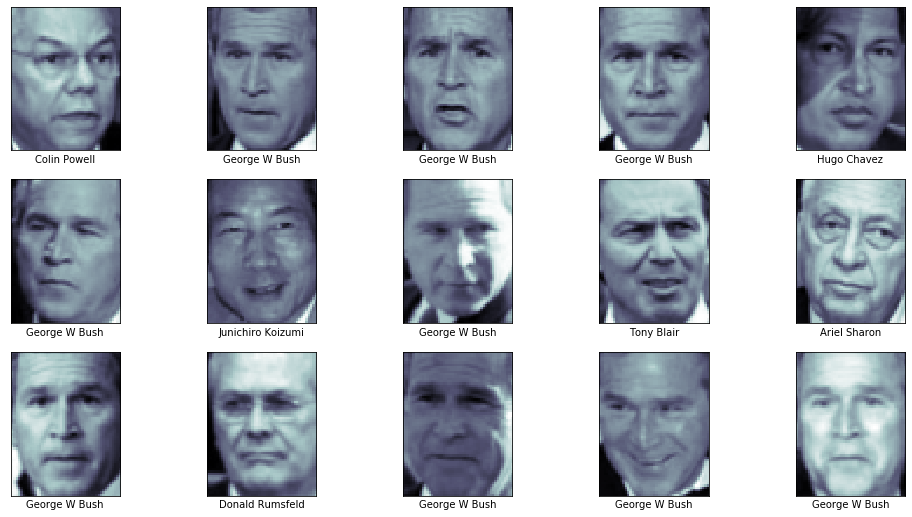

In [18]:
fig, ax = plt.subplots(3,5, figsize=(17,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone",)#Corolaración en blanco y negro =bone
    ax_i.set(xticks=[], yticks=[],xlabel=faces.target_names[faces.target[i]])

In [21]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [22]:
pca = PCA(n_components=150, whiten=True, random_state=43)
svc = SVC(kernel="rbf", class_weight="balanced")
model = make_pipeline(pca, svc)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state=42)

In [26]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {
    "svc__C":[0.1,1,5,10,50],#Doble barra baja
    "svc__gamma":[0.0001,0.0005,0.001,0.005,0.01]#Doble barra baja
}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, Ytrain)

Wall time: 2min 18s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=43,
                                            svd_solver='auto', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            ran

In [30]:
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.001}


In [31]:
classifier = grid.best_estimator_
yfit = classifier.predict(Xtest)

Text(0.5, 0.98, 'Predicciones de las imagenes (incorrectas en rojo)')

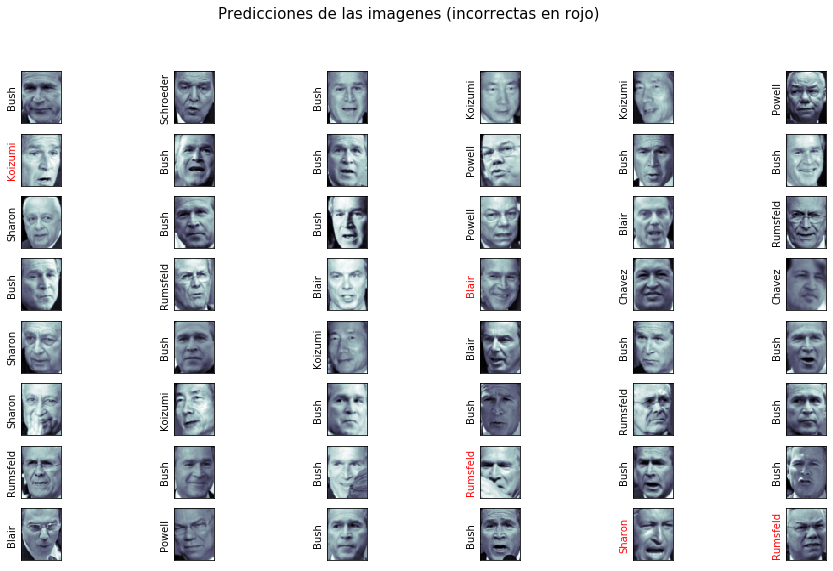

In [34]:
fig, ax = plt.subplots(8,6,figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[], yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color = "black"if yfit[i]==Ytest[i] else "red") 

fig.suptitle("Predicciones de las imagenes (incorrectas en rojo)", size =15)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(Ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.82      0.90      0.86        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.95      0.80      0.87       126
Gerhard Schroeder       0.82      0.78      0.80        23
      Hugo Chavez       0.94      0.75      0.83        20
Junichiro Koizumi       0.80      1.00      0.89        12
       Tony Blair       0.78      0.90      0.84        42

         accuracy                           0.84       337
        macro avg       0.81      0.86      0.83       337
     weighted avg       0.86      0.84      0.84       337



In [37]:
from sklearn.metrics import confusion_matrix

In [40]:
mat = confusion_matrix(Ytest, yfit)
mat

array([[ 13,   0,   2,   0,   0,   0,   0,   0],
       [  1,  61,   2,   3,   0,   0,   0,   1],
       [  1,   2,  26,   0,   1,   0,   0,   1],
       [  2,  10,   4, 101,   2,   1,   2,   4],
       [  0,   0,   1,   0,  18,   0,   1,   3],
       [  1,   1,   0,   1,   0,  15,   0,   2],
       [  0,   0,   0,   0,   0,   0,  12,   0],
       [  2,   0,   0,   1,   1,   0,   0,  38]], dtype=int64)

In [41]:
import seaborn as sns; sns.set()

C:\Users\Megaport\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Megaport\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


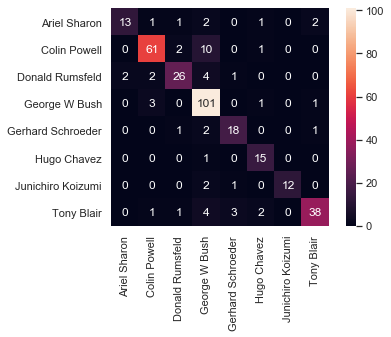

In [44]:
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=True, xticklabels=faces.target_names,
           yticklabels=faces.target_names)